# Proyecto Final
## Introducción al Análisis y Visualización de Datos con Python
---
Presentado por:
Miguel Angel Sastoque  y David Hernandez

# Problema de Negocio
Para el estado colombiano desde diferentes entidades (organos de control, ciudadanía, entidades, contratistas) es importante realizar un monitoreo de los procesos de contratación pública del país. Colombia Compra Eficiente es la etidad que se encarga de disponer la infraestructura para realizar los procesos de compra pública, los cuales se consolidan en SECOP I y SECOP II.  
Los datos se encuentran disponibles en Datos Abiertos. Para este ejercicio se utilzarán los datos de SECOP I de procesos de contratación, se tomarán datos del 2020.

*   https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-I/xvdy-vvsk

# 01. Recolección de Datos

In [ ]:
# instalación de librerias
!pip install sodapy
!pip install plotly
!pip install cufflinks

In [ ]:
# Importación de librerias
import pandas as pd
from sodapy import Socrata
from datetime import date, datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import cufflinks as cf
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

print(f'cf = {cf.__version__}')
print(f'pd = {pd.__version__}')
print(f'plotly = {plotly.__version__}')
print(f'sns = {sns.__version__}')

# Datos de conexión con la API
token  ="lJyn3KhRwMsGRF2LHeWL2B311"
client = Socrata("www.datos.gov.co",token)
ds_secop1="xvdy-vvsk"   #SECOP I COMPLETO_SEMANAL

# Funciones
def dates_ini_fin (ini, fin):
    ''' Función que retorna lista de fechas desde fecha inicio hasta fecha fin
        dates_ini_fin ("2019-01-01","2019-01-20")
        Return = lista con fechas
    '''
    start = datetime.strptime(ini, "%Y-%m-%d")
    end = datetime.strptime(fin, "%Y-%m-%d")
    date_generated = [start + timedelta(days=x) for x in range(0, (end-start).days)]

    fechas = []
    for date in date_generated:
        fechas.append(date.strftime("%m/%d/%Y"))
    return fechas



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


cf = 0.17.3
pd = 1.0.4
plotly = 4.4.1
sns = 0.10.1


## Secop 1
Para el ejeccicio se toman los datos directamente de datos abiertos a travez de una API utilizando la libreria SODAPY, debido a que el conjunto de datos de SECOP es muy grande, se requiere hace una consulta por día.   
Se utilizan los parámetros ***f_ini*** para indicar la fecha inicial de descarga y ***f_fin*** para la fecha final.

In [ ]:
# Fechas descarga
f_ini = '2020-01-01'    # Cargue la fecha inicial de descarga
f_fin = '2020-06-01'    # Cargue la fecha final de descarga
fechas = dates_ini_fin(f_ini, f_fin)
  
print("==== SECOP I Contratos desde {} hasta {} ====".format(fechas[0],fechas[len(fechas)-1]))
results = []
for fecha in fechas:
  a = "fecha_de_cargue_en_el_secop ==" + "'" + fecha + "'"
  #print(a)
  res = client.get(ds_secop1, 
                         limit=250000,
                         where = a)
  results.extend(res)
  
  # Imprimir en Pantalla
  print('{} | {} | {}'.format(datetime.now(), fecha ,len(res)))
    
df = pd.DataFrame.from_records(results)
        
print("=== Total de registros {} ===".format(df.shape))



==== SECOP I Contratos desde 01/01/2020 hasta 05/31/2020 ====
2020-06-16 02:44:55.016319 | 01/01/2020 | 393
2020-06-16 02:44:55.973750 | 01/02/2020 | 3049
2020-06-16 02:44:56.753320 | 01/03/2020 | 3013
2020-06-16 02:44:57.184511 | 01/04/2020 | 877
2020-06-16 02:44:57.535990 | 01/05/2020 | 206
2020-06-16 02:44:57.963418 | 01/06/2020 | 1000
2020-06-16 02:44:58.905978 | 01/07/2020 | 3991
2020-06-16 02:44:59.850408 | 01/08/2020 | 4577
2020-06-16 02:45:01.106022 | 01/09/2020 | 4968
2020-06-16 02:45:02.417859 | 01/10/2020 | 4368
2020-06-16 02:45:03.016698 | 01/11/2020 | 863
2020-06-16 02:45:03.417928 | 01/12/2020 | 664
2020-06-16 02:45:04.332275 | 01/13/2020 | 3623
2020-06-16 02:45:05.221944 | 01/14/2020 | 3531
2020-06-16 02:45:06.446873 | 01/15/2020 | 5573
2020-06-16 02:45:07.359054 | 01/16/2020 | 4185
2020-06-16 02:45:08.574344 | 01/17/2020 | 3735
2020-06-16 02:45:09.153644 | 01/18/2020 | 786
2020-06-16 02:45:09.519269 | 01/19/2020 | 284
2020-06-16 02:45:10.767217 | 01/20/2020 | 4816
2020-

In [ ]:
# Selección de Variables de interés - Se ejecuta la primera vez
try:
  df.drop(['anno_cargue_secop', 'id_tipo_de_proceso', 
        'id_regimen_de_contratacion', 
        'id_objeto_a_contratar',
        'municipio_obtencion', 'municipio_entrega',
        'id_grupo', 'nombre_grupo', 'id_familia', 'nombre_familia', 'id_clase',
        'nombre_clase', 'tipo_identifi_del_contratista',
        'dpto_y_muni_contratista', 'tipo_doc_representante_legal',
        'compromiso_presupuestal',
        'id_origen_de_los_recursos', 'codigo_bpin',
        'proponentes_seleccionados', 'calificacion_definitiva',
        'id_sub_unidad_ejecutora', 'nombre_sub_unidad_ejecutora',
        'moneda', 'espostconflicto',
        'marcacion_adiciones', 'posicion_rubro', 'nombre_rubro', 'valor_rubro',
        'sexo_replegal_entidad', 'pilar_acuerdo_paz', 'punto_acuerdo_paz',
        'municipios_ejecucion'], 
          axis = 'columns', inplace=True)
  print(df.shape)
except:
  print(df.shape)

(462092, 39)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462092 entries, 0 to 462091
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   uid                             462092 non-null  object
 1   anno_firma_del_contrato         462092 non-null  object
 2   nivel_entidad                   462092 non-null  object
 3   orden_entidad                   462092 non-null  object
 4   nombre_de_la_entidad            462092 non-null  object
 5   nit_de_la_entidad               462092 non-null  object
 6   c_digo_de_la_entidad            462092 non-null  object
 7   tipo_de_proceso                 462092 non-null  object
 8   estado_del_proceso              462092 non-null  object
 9   causal_de_otras_formas_de       462092 non-null  object
 10  regimen_de_contratacion         462091 non-null  object
 11  objeto_a_contratar              462092 non-null  object
 12  detalle_del_objeto_a_contratar

In [ ]:
df.head()

,uid,anno_firma_del_contrato,nivel_entidad,orden_entidad,nombre_de_la_entidad,nit_de_la_entidad,c_digo_de_la_entidad,tipo_de_proceso,estado_del_proceso,causal_de_otras_formas_de,regimen_de_contratacion,objeto_a_contratar,detalle_del_objeto_a_contratar,tipo_de_contrato,fecha_de_cargue_en_el_secop,numero_de_constancia,numero_de_proceso,numero_del_contrato,cuantia_proceso,id_ajudicacion,identificacion_del_contratista,nom_raz_social_contratista,identific_del_represen_legal,nombre_del_represen_legal,fecha_de_firma_del_contrato,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,objeto_del_contrato_a_la,origen_de_los_recursos,ruta_proceso_en_secop_i,municipio_entidad,departamento_entidad
0,20-12-10247947-9380761,2019,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,META - ALCALDÍA MUNICIPIO DE VILLAVICENCIO,No registra,250001001,Contratación Directa (Ley 1150 de 2007),Celebrado,Arrendamiento o Adquisición de Inmuebles (Lite...,Estatuto General de Contratación,Difusión de Tecnologías de Información y Telec...,ENTREGAR A TITULO DE COMODATO UN COMPUTADOR PO...,Comodato,01/01/2020,20-12-10247947,CONTRATO 2784 DE 2019,2784 DE 2019,0,9380761,901169709,JUNTA DE ACCION COMUNAL URBANIZACION HIERBABUENA,1121819084,LILIANA ASTRID BAQUERO ROJAS,12/26/2019,12/26/2019,24,M,0,0,12/26/2021,0,0,0,ENTREGAR A TITULO DE COMODATO UN COMPUTADOR PO...,No definido,{'url': 'https://www.contratos.gov.co/consulta...,Villavicencio,Meta
1,20-12-10247954-9380773,2019,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,META - ALCALDÍA MUNICIPIO DE VILLAVICENCIO,No registra,250001001,Contratación Directa (Ley 1150 de 2007),Celebrado,Arrendamiento o Adquisición de Inmuebles (Lite...,Estatuto General de Contratación,"Artículos Domésticos, Suministros y Productos ...",ENTREGAR A TITULO DE COMODATO UNA CABINA DE S...,Comodato,01/01/2020,20-12-10247954,CONTRATO 2786 DE 2019,2786 DE 2019,0,9380773,901280662,JUNTA DE ACCION COMUNAL URBANIZACIÓN LA CAROLINA,40393711,BLANCA IRENE QUEVEDO GUATAVITA,12/26/2019,12/26/2019,24,M,0,0,12/26/2021,0,0,0,ENTREGAR A TITULO DE COMODATO UNA CABINA DE S...,No definido,{'url': 'https://www.contratos.gov.co/consulta...,Villavicencio,Meta
2,20-4-10247816-9380595,2020,TERRITORIAL,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,SUCRE - E.S.E. CENTRO DE SALUD CARTAGENA DE IN...,823000878,270001730,Régimen Especial,Celebrado,Ninguna,Régimen Especial,"Servicios de Gestion, Servicios Profesionales ...",CONTRATO LABORAL COMO AUXILIAR DE ENFERMERÍA E...,Otro Tipo de Contrato,01/01/2020,20-4-10247816,L009-2020,L009-2020,3076062,9380595,1103096335,YESSICA REGINA TOVAR CÁRDENAS,1103096335,YESSICA REGINA TOVAR CARDENAS,01/01/2020,01/01/2020,3,M,0,0,04/01/2020,3076062,0,3076062,CONTRATO LABORAL COMO AUXILIAR DE ENFERMERÍA E...,Recursos propios,{'url': 'https://www.contratos.gov.co/consulta...,Sincelejo,Sucre
3,20-4-10247709-9380464,2020,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1,NORTE DE SANTANDER - E.S.E. HOSPITAL UNIVERSIT...,800014918,254001122,Régimen Especial,Celebrado,Ninguna,Régimen Especial,"Equipos y Suministros de Laboratorio, de Medic...",SUMINISTROS DE MATERIAL DE ARTROSCOPIA DE HOMB...,Suministro,01/01/2020,20-4-10247709,SS20M-075,004M,200000000,9380464,800061357,IMPLANTES Y SISTEMAS ORTOPEDICOS S.A,79780661,GONZALO ANTONIO CEPEDA CARDONA,01/01/2020,01/01/2020,2,M,60,0,05/01/2020,200000000,100000000,300000000,SUMINISTROS DE MATERIAL DE ARTROSCOPIA DE HOMB...,No definido,{'url': 'https://www.contratos.gov.co/consulta...,San José de Cúcuta,Norte De Santander
4,20-4-10247779-9380554,2020,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1,NORTE DE SANTANDER - E.S.E. HOSPITAL UNIVERSIT...,800014918,254001122,Régimen Especial,Celebrado,Ninguna,Régimen Especial,"Servicios de Transporte, Almacenaje y Correo",SERVICIO DE MENSAJERIA URBANA REGIONAL Y NACI...,Prestación de S

# Preparación de datos

In [ ]:
# Declaración de Funciones de limpieza y preparación de datos
def mayus(cadena):
  cadena_t = str(cadena).upper().replace('Á','A').replace('É','E').replace('Í','I').replace('Ó','O').replace('Ú','U').replace('\n',' ').replace('  ',' ').replace('.','')
  return cadena_t
mayus('Holñá')

def link(x):
  if type(x) is dict:
    u = list(x.values())
  else:
    u = x
  return u 
#link(df['ruta_proceso_en_secop_i'][0])

def plazo(x ,y):
  #print(x,y)
  if y == 'M': 
    p = int(x)*30 
  else: p = int(x)
  return p
plazo(df['plazo_de_ejec_del_contrato'][0],df['rango_de_ejec_del_contrato'][0])

def tiempo_f(f1,f2):
  try:
    f1 = datetime.strptime(str(f1), "%m/%d/%Y")
    f2 = datetime.strptime(str(f2), "%m/%d/%Y")
    d = (f2 - f1).days
  except:
    d = 0
  #print(f1,f2,d)
  return d 
tiempo_f(df['fecha_de_cargue_en_el_secop'][0],df['fecha_de_firma_del_contrato'][0])

def modal(x):
  if x == 'ASOCIACION PUBLICO PRIVADA' : m = 'ASOCIACION PUBLICO PRIVADA'
  elif x == 'CONCURSO DE MERITOS ABIERTO' : m = 'CONCURSO DE MERITOS'
  elif x == 'CONTRATACION DIRECTA (LEY 1150 DE 2007)' : m = 'CONTRATACION DIRECTA'
  elif x == 'CONTRATACION MINIMA CUANTIA' : m = 'MINIMA CUANTIA'
  elif x == 'CONTRATOS Y CONVENIOS CON MAS DE DOS PARTES' : m = 'OTRAS FORMAS DE CONTRATACION DIRECTA'
  elif x == 'LICITACION OBRA PUBLICA' : m = 'LICITACION PUBLICA'
  elif x == 'LICITACION PUBLICA' : m = 'LICITACION PUBLICA'
  elif x == 'REGIMEN ESPECIAL' : m = 'OTRAS FORMAS DE CONTRATACION DIRECTA'
  elif x == 'SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007)' : m = 'SELECCION ABREVIADA'
  elif x == 'SELECCION ABREVIADA DEL LITERAL H DEL NUMERAL 2 DEL ARTICULO 2 DE LA LEY 1150 DE 2007' : m = 'SELECCION ABREVIADA'
  elif x == 'SELECCION ABREVIADA SERVICIOS DE SALUD' : m = 'SELECCION ABREVIADA'
  elif x == 'SUBASTA' : m = 'SELECCION ABREVIADA'
  else: m = 'OTRAS FORMAS DE CONTRATACION DIRECTA'
  return m

In [ ]:
#df.apply?
#df['fecha_de_firma_del_contrato'].value_counts()
#df['tiempo_fechas'] = df.apply(lambda x : tiempo_f(x['fecha_de_cargue_en_el_secop'],x['fecha_de_firma_del_contrato']), axis=1 )
#df['modalidad'] = df['tipo_de_proceso'].apply(lambda x : modal(x))

In [ ]:
# Cambio de tipo de las variables y estandarización
df[ 'anno_firma_del_contrato'] = df[ 'anno_firma_del_contrato'].apply(lambda x : int(x) )
df[ 'tiempo_adiciones_en_dias'] = df[ 'tiempo_adiciones_en_dias'].apply(lambda x : int(x) ) ##
df[ 'tiempo_adiciones_en_meses'] = df[ 'tiempo_adiciones_en_meses'].apply(lambda x : int(x) )##
df[ 'cuantia_contrato'] = df[ 'cuantia_contrato'].apply(lambda x : int(x) )##
df[ 'valor_total_de_adiciones'] = df[ 'valor_total_de_adiciones'].apply(lambda x : int(x) )##
df[ 'valor_contrato_con_adiciones'] = df[ 'valor_contrato_con_adiciones'].apply(lambda x : int(x) )##
df[ 'cuantia_proceso'] = df[ 'cuantia_proceso'].apply(lambda x : int(x) )##

df[ 'nivel_entidad'] = df[ 'nivel_entidad'].apply(lambda x : mayus(x) )
df[ 'orden_entidad'] = df[ 'orden_entidad'].apply(lambda x : mayus(x) )
df[ 'nombre_de_la_entidad'] = df[ 'nombre_de_la_entidad'].apply(lambda x : mayus(x) )
df[ 'tipo_de_proceso'] = df[ 'tipo_de_proceso'].apply(lambda x : mayus(x) )
df[ 'estado_del_proceso'] = df[ 'estado_del_proceso'].apply(lambda x : mayus(x) )
df[ 'causal_de_otras_formas_de'] = df[ 'causal_de_otras_formas_de'].apply(lambda x : mayus(x) )
df[ 'regimen_de_contratacion'] = df[ 'regimen_de_contratacion'].apply(lambda x : mayus(x) )
df[ 'objeto_a_contratar'] = df[ 'objeto_a_contratar'].apply(lambda x : mayus(x) )
df[ 'detalle_del_objeto_a_contratar'] = df[ 'detalle_del_objeto_a_contratar'].apply(lambda x : mayus(x) )
df[ 'tipo_de_contrato'] = df[ 'tipo_de_contrato'].apply(lambda x : mayus(x) )
df[ 'id_ajudicacion'] = df[ 'id_ajudicacion'].apply(lambda x : mayus(x) )
df[ 'nom_raz_social_contratista'] = df[ 'nom_raz_social_contratista'].apply(lambda x : mayus(x) )
df[ 'nombre_del_represen_legal'] = df[ 'nombre_del_represen_legal'].apply(lambda x : mayus(x) )
df[ 'objeto_del_contrato_a_la'] = df[ 'objeto_del_contrato_a_la'].apply(lambda x : mayus(x) )
df[ 'origen_de_los_recursos'] = df[ 'origen_de_los_recursos'].apply(lambda x : mayus(x) )
df[ 'ruta_proceso_en_secop_i'] = df[ 'ruta_proceso_en_secop_i'].apply(lambda x : link(x) )
df[ 'municipio_entidad'] = df[ 'municipio_entidad'].apply(lambda x : mayus(x) )
df[ 'departamento_entidad'] = df[ 'departamento_entidad'].apply(lambda x : mayus(x) )

df[ 'identific_del_represen_legal'] = df[ 'identific_del_represen_legal'].apply(lambda x : mayus(x) )#--
df[ 'identificacion_del_contratista'] = df[ 'identificacion_del_contratista'].apply(lambda x : mayus(x) )#--

df[ 'fecha_de_cargue_en_el_secop'] = df[ 'fecha_de_cargue_en_el_secop'].apply(lambda x : x )###
df[ 'fecha_de_firma_del_contrato'] = df[ 'fecha_de_firma_del_contrato'].apply(lambda x : x )###
df[ 'fecha_ini_ejec_contrato'] = df[ 'fecha_ini_ejec_contrato'].apply(lambda x : x ) ###
df[ 'fecha_fin_ejec_contrato'] = df[ 'fecha_fin_ejec_contrato'].apply(lambda x : x )###

In [ ]:
# Nuevas vaiables
df['adjudicado'] = df['id_ajudicacion'].apply(lambda x : "SI" if x != "0" else "NO")
df['uid_proc'] = df['uid'].apply(lambda x : x.split("-")[0] + '-' + x.split("-")[1] + '-' + x.split("-")[2] )
df['plazo_dias'] = df.apply(lambda x : plazo(x['plazo_de_ejec_del_contrato'],x['rango_de_ejec_del_contrato']), axis=1 )
df['tiempo_fechas'] = df.apply(lambda x : tiempo_f(x['fecha_de_cargue_en_el_secop'],x['fecha_de_firma_del_contrato']), axis=1 )
df['modalidad'] = df['tipo_de_proceso'].apply(lambda x : modal(x))

In [ ]:
list(df['tipo_de_proceso'].value_counts().to_frame().index)
df['modalidad'].value_counts().to_frame()
#modal(df['tipo_de_proceso'][0])

,modalidad
CONTRATACION DIRECTA,255449
OTRAS FORMAS DE CONTRATACION DIRECTA,180474
MINIMA CUANTIA,20801
SELECCION ABREVIADA,3523
LICITACION PUBLICA,1219
CONCURSO DE MERITOS,516
ASOCIACION PUBLICO PRIVADA,110


# Procesos Adjudicados vs No Adjudicados
Los procesos de contratación pasan por varios estados agrupados en la etapa precontractual y la etapa de ejecución del contrato.  
En esta sección se analizarán estos datos desde estas dos perspectivas.

## Procesos No adjudicados
* ¿Cuantos procesos estan adjudicados y cuales no?  
* ¿Cuál es es valor de estos procesos?

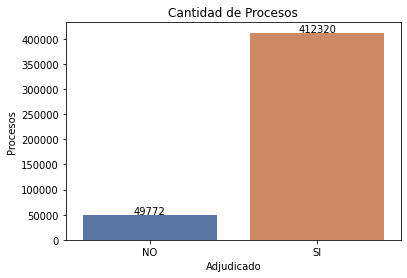

In [ ]:
#print(df['adjudicado'].value_counts())
df_group=df.groupby('adjudicado').count().reset_index()

g = sns.barplot(x='adjudicado',y='uid',data=df_group, palette='deep')
g.set(title = 'Cantidad de Procesos', xlabel = 'Adjudicado', ylabel = 'Procesos')

for index, row in df_group.iterrows():
  g.text(row.name,row['uid']+1000, str(row['uid']), color='black', ha="center")
  # g.text(x,y, text, color, ha)
plt.show()


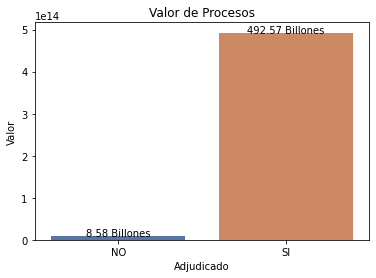

In [ ]:
#print(df.groupby('adjudicado').sum()['cuantia_proceso']/(10**12) ) #Billones
df_group = df.groupby('adjudicado').sum().reset_index()

g = sns.barplot(x='adjudicado',y='cuantia_proceso',data=df_group, palette='deep')
g.set(title = 'Valor de Procesos', xlabel = 'Adjudicado', ylabel = 'Valor')

for index, row in df_group.iterrows():
  g.text(row.name,row['cuantia_proceso'] + 10**11, str(round(row['cuantia_proceso']/(10**12) ,2))+ " Billones", color='black', ha="center")
  # g.text(x,y, text)
plt.show()

Se observa que existen 49227 procesos de contratación pública por un vaolr de 8.58 Billones de pesos abiertos, y 412.320 procesos por 492 billones de pesos desde Enero a Junio de 2020.

* De todos los procesos, ¿Por cuál modalidad es donde se realiza una mayor contratación?

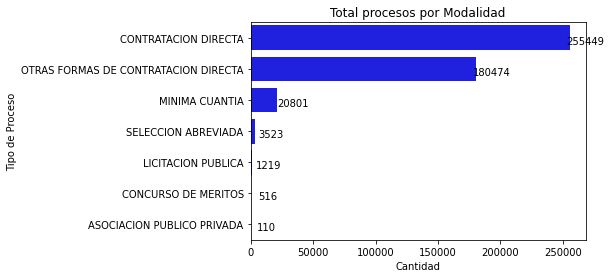

In [ ]:
df_group = df.groupby('modalidad').count().sort_values("uid", ascending=False).reset_index()

g = sns.barplot(x='uid',y='modalidad',data=df_group,color='b')
g.set(title = 'Total procesos por Modalidad', xlabel = 'Cantidad', ylabel = 'Tipo de Proceso')

ma = max(df_group['uid'])
for index, row in df_group.iterrows():
  g.text(row['uid']+ ma*0.05, row.name + 0.2, row['uid'], color='black', ha="center")
  # g.text(x,y, text)
plt.show()

La modalidad que más se tuliza es la contratación directa y otras formas de contratación directa, las cuales superan el 80% de los procesos de contratación del pais.

* ¿Cómo se distribuyen los procesos que aún estan por adjudicar por Modalidad?

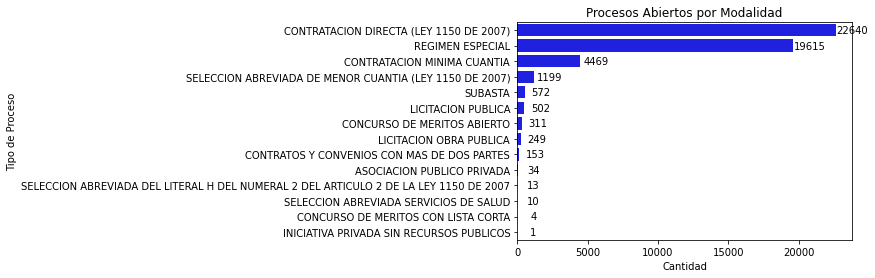

In [ ]:
df_group = df[df['adjudicado']=='NO'].groupby('tipo_de_proceso').count().sort_values("uid", ascending=False).reset_index()

g = sns.barplot(x='uid',y='tipo_de_proceso',data=df_group, color='b')
g.set(title = 'Procesos Abiertos por Modalidad', xlabel = 'Cantidad', ylabel = 'Tipo de Proceso')

ma = max(df_group['uid'])
for index, row in df_group.iterrows():
  g.text(row['uid']+ ma*0.05, row.name + 0.2, row['uid'], color='black', ha="center")
  # g.text(x,y, text)
plt.show()

Entrando en más detalle, para cada uno de los tipos de procesos, se encuentra que contratación directa y regimen especial se llevan la mator parte de los procesos adjudicadas a la fecha. Estos procesos presentan menos tiempos en la etapa precontractual, y no estan obligados a presetar garantias de multiples oferentes, lo cual conlleva un riesgo que la contratación pública se esté dirigiendo a ciertos contratistas.

A partir de este punto nos interesa solo el conjunto de datos de los procesos adjudicados.  
Son aquellos que ya tienen contrato, contratista y fecha de suscripción.


In [ ]:
df_ini = df.copy()
df = df[df['adjudicado']=='SI']
df.shape

(412320, 44)

#Fechas de cargue y suscripción
Se supone que por ley 1150 las entidades deben registrar la información en SECOP dentro de los 5 días siguientes. Vamos a ver como se comportan las variables Fecha de Cargue en el secop y fecha de suscripción del contrato.

Fecha Firma - Fecha Cargue > 0  --> Firmaron despues del cargue
Fecha Firma - Fecha Cargue < 0  --> Cargue despues de la firma


In [ ]:
df['modalidad'].value_counts()

CONTRATACION DIRECTA                    232809
OTRAS FORMAS DE CONTRATACION DIRECTA    160701
MINIMA CUANTIA                           16332
SELECCION ABREVIADA                       1729
LICITACION PUBLICA                         468
CONCURSO DE MERITOS                        205
ASOCIACION PUBLICO PRIVADA                  76
Name: modalidad, dtype: int64

In [ ]:
df_show = df.sample(n=100000)

In [ ]:

fig = px.box(data_frame=df_show, y='tiempo_fechas',x='modalidad',
             hover_name='modalidad', 
             hover_data=['uid_proc','tiempo_fechas','fecha_de_cargue_en_el_secop','fecha_de_firma_del_contrato'],
             template='ggplot2'
            )
fig.update_layout(
    title= "Diferencia días Fecha Carga y Suscripción por Modalidad",
    xaxis_title="Modalidad",
    yaxis_title="Días de Diferencia"
)    
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Se observa como los procesos de contratación directa y otras formad de contratación directa presentan una mayor generación de fechas re registro atípicas, se registra el contrato en SECOP 9 años después de su ejecución, lo cual genera un riesgo alto ya es no se hace un control social, y posiblemente no hayan sido parte de los procesos de auditoria.  

Por otra parte, se encuentra que hay procesos de licitación pública que se pueden demorar hasta 130 días en la adjudicación, un poco más de 4 meses.   
Estos tiempos son un poco más lasrgos que los expuestos por la ley 1150 (2 meses) ya que en la práctica, se presentan observaciones a los procesos que alargan los tiempos.

In [ ]:
df['registro_tarde'] = df['tiempo_fechas'].apply(lambda x : "SI" if x < -5 else "NO")


SI    240104
NO    172216
Name: registro_tarde, dtype: int64


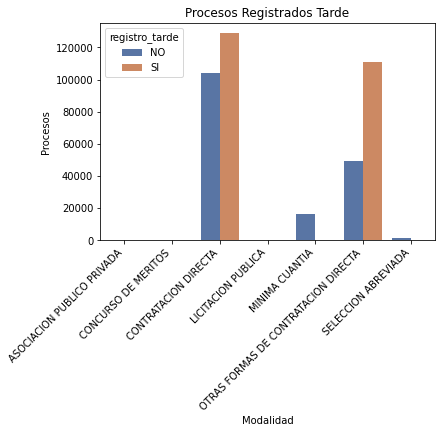

In [ ]:
print(df['registro_tarde'].value_counts())
df_group=df.groupby(['registro_tarde','modalidad']).count().reset_index()
df_group.head(20)

g = sns.barplot(x='modalidad',y='uid', hue="registro_tarde",
                data=df_group, palette='deep')
g.set(title = 'Procesos Registrados Tarde', xlabel = 'Modalidad', ylabel = 'Procesos')

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


Se generan alertas a razón de un registro tarde dentro del sistema, la contratación directa, y otras formas de contratación directa son las que más alertas presentan. se genera un total de 240.104 alertas.

#Relación entre Tipo Contrato y Modalidad

¿Cuáles son los tipos de contratos que se realizan para cada una de las modalidades?

In [ ]:
df_group=df.groupby(['tipo_de_proceso','tipo_de_contrato']).count().reset_index()[['uid','tipo_de_proceso','tipo_de_contrato']]
df_group.head(5)


,uid,tipo_de_proceso,tipo_de_contrato
0,76,ASOCIACION PUBLICO PRIVADA,NO DEFINIDO
1,93,CONCURSO DE MERITOS ABIERTO,CONSULTORIA
2,71,CONCURSO DE MERITOS ABIERTO,INTERVENTORIA
3,1,CONCURSO DE MERITOS ABIERTO,OBRA
4,6,CONCURSO DE MERITOS ABIERTO,OTRO TIPO DE CONTRATO


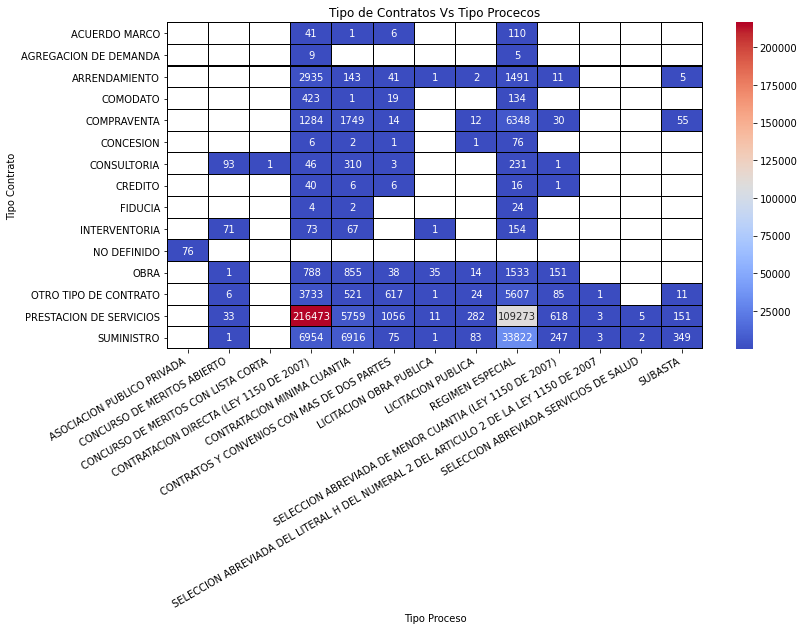

In [ ]:
df_pivot = df_group.pivot_table(values='uid',index=['tipo_de_contrato'],columns=['tipo_de_proceso'])
df_pivot.head(20)
fig, ax = plt.subplots(figsize=(12,6))         # Sample figsize in inches
g = sns.heatmap(df_pivot, cmap='coolwarm',
                annot=True,  fmt='.0f',linewidths=0.1, linecolor='black')

g.set(title = 'Tipo de Contratos Vs Tipo Procecos', xlabel = 'Tipo Proceso', ylabel = 'Tipo Contrato')

g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

Al entrar en detalle en el tipo de contratos que se realizar de forma direecta, resalta la prestación de servicios con 216 mil para contratación directa y 109 mil para regimen especial.

# Contratación de las Entidades
¿Cuáles son las entidades que más han contratado este año?


In [ ]:
dict_agg = {'uid':'count','cuantia_contrato':'sum'}
df_group = df.groupby(['nombre_de_la_entidad','nivel_entidad'])[['uid','cuantia_contrato']].agg(dict_agg)
df_group.reset_index(inplace=True)
df_group['cuantia_contrato'] =df_group['cuantia_contrato']/(10**6)
df_show = df_group.sort_values('cuantia_contrato',ascending=False).rename(columns={'uid':'Num_Contratos'}).head(10)
df_show

,nombre_de_la_entidad,nivel_entidad,Num_Contratos,cuantia_contrato
409,ANTIOQUIA - ESE METROSALUD - MEDELLIN,TERRITORIAL,2770,1.269518e+08
3390,DEFENSORIA DEL PUEBLO (DEFENSORIA),NACIONAL,10038,1.354408e+07
3904,MAGDALENA - ALCALDIA MUNICIPIO DE SANTA BARBAR...,TERRITORIAL,216,3.571839e+06
2543,CENIT TRANSPORTE Y LOGISTICA DE HIDROCARBUROS SAS,TERRITORIAL,466,1.747924e+06
104,ANTIOQUIA - ALCALDIA MUNICIPIO DE MURINDO,TERRITORIAL,58,8.621167e+05
1010,BOGOTA DC - EMPRESA DE ACUEDUCTO Y ALCANTARILLADO,TERRITORIAL,172,6.548087e+05
3399,ECOPETROL - EMPRESA COLOMBIANA DE PETROLEOS,NACIONAL,99,6.133374e+05
3487,HUILA - ALCALDIA MUNICIPIO DE TESALIA,TERRITORIAL,91,5.562727e+05
2799,CORDOBA - ESE CAMU EL AMPARO - MONTERIA,TERRITORIAL,158,5.312368e+05
158,ANTIOQUIA - ALIANZA MEDELLIN ANTIOQUIA EPS SAS,TERRITORIAL,218,5.049990e+05


In [ ]:
df_show = df_show.sort_values('cuantia_contrato',ascending=True)

fig = px.bar(data_frame=df_show, x='cuantia_contrato',y='nombre_de_la_entidad', 
             orientation='h',
             hover_name='nombre_de_la_entidad', 
             hover_data=['nivel_entidad','Num_Contratos'],

             template='ggplot2'
            )
fig.update_layout(
    title= "Contratación Entidades",
    xaxis_title="Valor en millones",
    yaxis_title=""
)    
fig.show()

De acuero a la información, La ESE metro Salud registra 2770 contratos por un valor de 126 Billones, Presupuesto que no corresponde con la realidad, lo que hace presumir que hay algún registro con información errada del valor de contrato. Lo mismo podriamos suponer de la defensoria del pueblo y de la alcaldía de santa barbara en MAgdalena, y el municipio de Murindo.   
La empresa CENI es de Hidrocarburos de Ecopetros, ese presupuesto si lo podría estar manejando esa entidad.


# Analisis de concentración de contratos

* ¿Qué contratista tiene una mayor cantidad de contratos y por valor de los mismos?
* ¿Exsite relacion ente diferentes representantes legales y empresas?

In [ ]:
dict_agg = {'uid':'count','nom_raz_social_contratista':'max','cuantia_contrato':'sum'}
df_group = df.groupby(['identificacion_del_contratista'])[['uid','nom_raz_social_contratista','cuantia_contrato']].agg(dict_agg)

df_group.reset_index(inplace=True)
df_group['cuantia_contrato'] =df_group['cuantia_contrato']/(10**6)
df_show = df_group.sort_values('cuantia_contrato',ascending=False).rename(columns={'uid':'Num_Contratos'}).head(10)
df_show
#df_group.head()

,identificacion_del_contratista,Num_Contratos,nom_raz_social_contratista,cuantia_contrato
236204,890900267,2,PRODUCTORA Y COMERCIALIZADORA ODONTOLOGICA NEW...,1.268844e+08
159784,39490926,1,IRINA CAMAÑO RAMIREZ,3.570000e+06
235588,890209174,2,ISMOCOL SA,8.777728e+05
247130,900796602,12,LAURA CRISTINA ACOSTA SUCERQUIA,8.059949e+05
245267,900619863,2,STORK TECHNICAL SERVICES HOLDING BV SUCURSAL C...,6.124084e+05
224509,812001561,28,COOPERATIVA DE ENTIDADES DE SALUD DE COROBA,5.046443e+05
241545,900332875,1,EMPRESAS PUBLICAS DE TESALIA SA ESP EMTESALIA ...,5.000278e+05
226784,830069311,1,NABORS DRILLING INTERNATIONAL LTD - BERMUDA,4.875000e+05
224421,811044253,30,ASEAR SA ESP,3.937040e+05
244729,9005745893,1,INGAGROF SAS,3.181381e+05


In [ ]:
df_show = df_show.sort_values('cuantia_contrato',ascending=True)

fig = px.bar(data_frame=df_show, x='cuantia_contrato',y='nom_raz_social_contratista', 
             orientation='h',
             hover_name='nom_raz_social_contratista', 
             hover_data=['identificacion_del_contratista','Num_Contratos'],

             template='ggplot2'
            )
fig.update_layout(
    title= "Contratación Contratistas",
    xaxis_title="Valor en millones",
    yaxis_title=""
)    
fig.show()

En este apartado también se rebleja un presunto error ya que una empresa de odontologia no podría tener 126 Billones de pesos en 2 contratos. Luego aparecen algunas personas naturales con un valor muy alto, que se deberían verificar posibles errores en el registro o validad si efectivamente tienen todos esso contratos.

# Valor Proceso y Valor Contrato

In [ ]:
df_data = df.copy(deep=True)

df_data['cuantia_contrato'] = df_data['cuantia_contrato']/(10**6)
df_data['cuantia_proceso'] = df_data['cuantia_proceso']/(10**6)

df_data.head()


,uid,anno_firma_del_contrato,nivel_entidad,orden_entidad,nombre_de_la_entidad,nit_de_la_entidad,c_digo_de_la_entidad,tipo_de_proceso,estado_del_proceso,causal_de_otras_formas_de,regimen_de_contratacion,objeto_a_contratar,detalle_del_objeto_a_contratar,tipo_de_contrato,fecha_de_cargue_en_el_secop,numero_de_constancia,numero_de_proceso,numero_del_contrato,cuantia_proceso,id_ajudicacion,identificacion_del_contratista,nom_raz_social_contratista,identific_del_represen_legal,nombre_del_represen_legal,fecha_de_firma_del_contrato,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,objeto_del_contrato_a_la,origen_de_los_recursos,ruta_proceso_en_secop_i,municipio_entidad,departamento_entidad,adjudicado,uid_proc,plazo_dias,tiempo_fechas,modalidad,registro_tarde
0,20-12-10247947-9380761,2019,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,META - ALCALDIA MUNICIPIO DE VILLAVICENCIO,No registra,250001001,CONTRATACION DIRECTA (LEY 1150 DE 2007),CELEBRADO,ARRENDAMIENTO O ADQUISICION DE INMUEBLES (LITE...,ESTATUTO GENERAL DE CONTRATACION,DIFUSION DE TECNOLOGIAS DE INFORMACION Y TELEC...,ENTREGAR A TITULO DE COMODATO UN COMPUTADOR PO...,COMODATO,01/01/2020,20-12-10247947,CONTRATO 2784 DE 2019,2784 DE 2019,0.000000,9380761,901169709,JUNTA DE ACCION COMUNAL URBANIZACION HIERBABUENA,1121819084,LILIANA ASTRID BAQUERO ROJAS,12/26/2019,12/26/2019,24,M,0,0,12/26/2021,0.000000,0,0,ENTREGAR A TITULO DE COMODATO UN COMPUTADOR PO...,NO DEFINIDO,[https://www.contratos.gov.co/consultas/detall...,VILLAVICENCIO,META,SI,20-12-10247947,720,-6,CONTRATACION DIRECTA,SI
1,20-12-10247954-9380773,2019,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,META - ALCALDIA MUNICIPIO DE VILLAVICENCIO,No registra,250001001,CONTRATACION DIRECTA (LEY 1150 DE 2007),CELEBRADO,ARRENDAMIENTO O ADQUISICION DE INMUEBLES (LITE...,ESTATUTO GENERAL DE CONTRATACION,"ARTICULOS DOMESTICOS, SUMINISTROS Y PRODUCTOS ...",ENTREGAR A TITULO DE COMODATO UNA CABINA DE SO...,COMODATO,01/01/2020,20-12-10247954,CONTRATO 2786 DE 2019,2786 DE 2019,0.000000,9380773,901280662,JUNTA DE ACCION COMUNAL URBANIZACION LA CAROLINA,40393711,BLANCA IRENE QUEVEDO GUATAVITA,12/26/2019,12/26/2019,24,M,0,0,12/26/2021,0.000000,0,0,ENTREGAR A TITULO DE COMODATO UNA CABINA DE SO...,NO DEFINIDO,[https://www.contratos.gov.co/consultas/detall...,VILLAVICENCIO,META,SI,20-12-10247954,720,-6,CONTRATACION DIRECTA,SI
2,20-4-10247816-9380595,2020,TERRITORIAL,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,SUCRE - ESE CENTRO DE SALUD CARTAGENA DE INDIA...,823000878,270001730,REGIMEN ESPECIAL,CELEBRADO,NINGUNA,REGIMEN ESPECIAL,"SERVICIOS DE GESTION, SERVICIOS PROFESIONALES ...",CONTRATO LABORAL COMO AUXILIAR DE ENFERMERIA E...,OTRO TIPO DE CONTRATO,01/01/2020,20-4-10247816,L009-2020,L009-2020,3.076062,9380595,1103096335,YESSICA REGINA TOVAR CARDENAS,1103096335,YESSICA REGINA TOVAR CARDENAS,01/01/2020,01/01/2020,3,M,0,0,04/01/2020,3.076062,0,3076062,CONTRATO LABORAL COMO AUXILIAR DE ENFERMERIA E...,RECURSOS PROPIOS,[https://www.contratos.gov.co/consultas/detall...,SINCELEJO,SUCRE,SI,20-4-10247816,90,0,OTRAS FORMAS DE CONTRATACION DIRECTA,NO
3,20-4-10247709-9380464,2020,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1,NORTE DE SANTANDER - ESE HOSPITAL UNIVERSITARI...,800014918,254001122,REGIMEN ESPECIAL,CELEBRADO,NINGUNA,REGIMEN ESPECIAL,"EQUIPOS Y SUMINISTROS DE LABORATORIO, DE MEDIC...",SUMINISTROS DE MATERIAL DE ARTROSCOPIA DE HOMB...,SUMINISTRO,01/01/2020,20-4-10247709,SS20M-075,004M,200.000000,9380464,800061357,IMPLANTES Y SISTEMAS ORTOPEDICOS SA,79780661,GONZALO ANTONIO CEPEDA CARDONA,01/01/2020,01/01/2020,2,M,60,0,05/01/2020,200.000000,100000000,300000000,SUMINISTROS DE MATERIAL DE ARTROSCOPIA DE HOMB...,NO DEFINIDO,[https://www.contratos.gov.co/consultas/detall...,SAN JOSE DE CUCUTA,NORTE DE SANTANDER,SI,20-4-10247709,60,0,OTRAS FORMAS DE CONTRATACION 

In [ ]:
df_data = df_data.sample(n=100000)
fig = px.scatter(data_frame=df_data, x='cuantia_proceso',y='cuantia_contrato',
                 color='modalidad',
                 hover_name='modalidad', 
                 hover_data=['uid_proc','nombre_de_la_entidad'],
                 template='ggplot2'
            )
fig.update_layout(
    title= "Valor Proceso Vs Valor Contrato",
    xaxis_title="Valor Contrato en millones",
    yaxis_title="Valor Proceso en Millones"
)    
fig.show()

Output hidden; open in https://colab.research.google.com to view.

La variable valor del proceso, es el valor por el cual inica el proceso de contratación y al momento de la firma el contrato se ajusta por diferentes motivos, se espera que estas variables presenten una correlación directa e incluso sean iguales en la mayoria de los casos.  
al analizar en detalle se observa que entre estos ocurre una relación de 10 o 100 veces, lo que indica que al momento del registro, las personas agregan  uno 2 o tres ceros de más.

# Mallas

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
print(f'nx = {nx.__version__}')

nx = 2.4


In [ ]:
def plot_graph(nodes, edges, labels=False, node_size=False,
               node_color='r', arrows=False, alpha=0.1):
    """nodes: list of nodes. Used as labels if labels=True
       edges: list of edges. Edges are tuples.
       node_size: size or list of sizes
       node_color: color or list of colors
    """
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    nx.draw(G, with_labels=labels, node_color=node_color,
            node_size=node_size, arrows=arrows, alpha=alpha)

In [ ]:
df_net =  df[df['identificacion_del_contratista'] !=df['identific_del_represen_legal']]

df_net = df_net[['uid','nombre_de_la_entidad','nit_de_la_entidad','identificacion_del_contratista','nom_raz_social_contratista','identific_del_represen_legal','nombre_del_represen_legal','fecha_de_firma_del_contrato','cuantia_contrato','uid_proc']]
df_net.sort_values('identific_del_represen_legal').head(2)

,uid,nombre_de_la_entidad,nit_de_la_entidad,identificacion_del_contratista,nom_raz_social_contratista,identific_del_represen_legal,nombre_del_represen_legal,fecha_de_firma_del_contrato,cuantia_contrato,uid_proc
435349,20-4-10770267-9898472,VALLE DEL CAUCA - FUNDACION UNIVERSIDAD DEL VALLE,800187151,901221721,SCL PRODUCCIONES SAS,0,SANDRA CAROLINA OSPINA SALDARRIAGA,11/26/2019,20800000,20-4-10770267
419893,20-4-10751655-9876241,VALLE DEL CAUCA - ESE HOSPITAL LOCAL DE CANDEL...,891380184,1130595342,CINDY MARCELA URIBE ARANGO,0000,0000 0000,01/01/2020,2310792,20-4-10751655


In [ ]:
df_net = df_net.sort_values('cuantia_contrato',ascending=False).head(5000)
print(df_net.shape)
node_1 = df_net.groupby('identificacion_del_contratista')['cuantia_contrato'].sum().to_frame()
node_1.reset_index(inplace=True)
node_1 = node_1.rename(columns={'identificacion_del_contratista':'id'})
print(node_1.shape)
node_2 = df_net.groupby('identific_del_represen_legal')['cuantia_contrato'].sum().to_frame()
node_2.reset_index(inplace=True)
node_2 = node_2.rename(columns={'identific_del_represen_legal':'id'})
node_2['cuantia_contrato'] = 0
print(node_2.shape)
nodes = pd.concat([node_1,node_2])
print(nodes.shape)

edges = df_net[['identificacion_del_contratista','identific_del_represen_legal']]



(5000, 10)
(3411, 2)
(3426, 2)
(6837, 2)


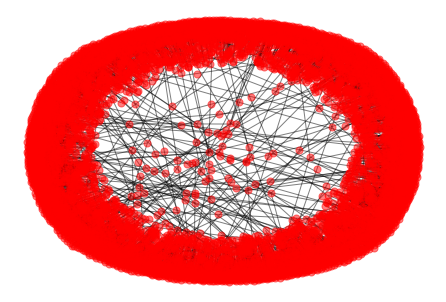

In [ ]:
plot_graph(nodes=nodes['id'],
           edges=[tuple(row) for row in edges.values],
           labels=False,
           node_color='r',
           node_size=50,
           alpha=0.5)


Se realiza el analizis de relaciones entre contratistas y representantes legales, sin enbargo por la cantidad de registros no es facil identificar los elementos de  mayor interés. fue necesario reducir la muestra para lograr generar el gráfico.

# Datos geográficos

In [ ]:
%cd /
geo = pd.read_csv('DM_FIX.csv',sep='|',encoding='utf-8')
print(geo.dtypes)
print(geo.shape)
geo.head(10)

/
LLAVE        object
Longitud    float64
Latitud     float64
dtype: object
(1104, 3)


,LLAVE,Longitud,Latitud
0,ANTIOQUIA-MEDELLIN,-75.581713,6.246716
1,ANTIOQUIA-ABEJORRAL,-75.428738,5.789304
2,ANTIOQUIA-ABRIAQUI,-76.064703,6.631806
3,ANTIOQUIA-ALEJANDRIA,-75.141333,6.376066
4,ANTIOQUIA-AMAGA,-75.701946,6.038809
5,ANTIOQUIA-AMALFI,-75.082524,6.912305
6,ANTIOQUIA-ANDES,-75.878792,5.656775
7,ANTIOQUIA-ANGELOPOLIS,-75.711351,6.109614
8,ANTIOQUIA-ANGOSTURA,-75.335116,6.885175
9,ANTIOQUIA-ANORI,-75.148348,7.074708


In [ ]:
df['LLAVE'] = df.apply(lambda x: str(x['departamento_entidad'])+"-"+str(x['municipio_entidad']), axis=1)
df['LLAVE'].value_counts()


ANTIOQUIA-MEDELLIN                       36105
BOGOTA DC-BOGOTA DC                      27667
VALLE DEL CAUCA-CALI                     19405
NORTE DE SANTANDER-SAN JOSE DE CUCUTA     6626
BOLIVAR-CARTAGENA                         6447
                                         ...  
ATLANTICO-TUBARA                             5
COLOMBIA-TODO EL PAIS                        4
CAUCA-PURACE                                 4
BOLIVAR-VILLANUEVA                           3
ATLANTICO-PIOJO                              1
Name: LLAVE, Length: 1099, dtype: int64

In [ ]:
df.shape

(412320, 47)

In [ ]:
df_geo =pd.merge(df, geo, how='left', on='LLAVE')
print(df_geo.shape)

(412320, 49)


In [ ]:
df_geo.head(2)

,uid,anno_firma_del_contrato,nivel_entidad,orden_entidad,nombre_de_la_entidad,nit_de_la_entidad,c_digo_de_la_entidad,tipo_de_proceso,estado_del_proceso,causal_de_otras_formas_de,regimen_de_contratacion,objeto_a_contratar,detalle_del_objeto_a_contratar,tipo_de_contrato,fecha_de_cargue_en_el_secop,numero_de_constancia,numero_de_proceso,numero_del_contrato,cuantia_proceso,id_ajudicacion,identificacion_del_contratista,nom_raz_social_contratista,identific_del_represen_legal,nombre_del_represen_legal,fecha_de_firma_del_contrato,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,objeto_del_contrato_a_la,origen_de_los_recursos,ruta_proceso_en_secop_i,municipio_entidad,departamento_entidad,adjudicado,uid_proc,plazo_dias,tiempo_fechas,modalidad,registro_tarde,llave,LLAVE,Longitud,Latitud
0,20-12-10247947-9380761,2019,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,META - ALCALDIA MUNICIPIO DE VILLAVICENCIO,No registra,250001001,CONTRATACION DIRECTA (LEY 1150 DE 2007),CELEBRADO,ARRENDAMIENTO O ADQUISICION DE INMUEBLES (LITE...,ESTATUTO GENERAL DE CONTRATACION,DIFUSION DE TECNOLOGIAS DE INFORMACION Y TELEC...,ENTREGAR A TITULO DE COMODATO UN COMPUTADOR PO...,COMODATO,01/01/2020,20-12-10247947,CONTRATO 2784 DE 2019,2784 DE 2019,0,9380761,901169709,JUNTA DE ACCION COMUNAL URBANIZACION HIERBABUENA,1121819084,LILIANA ASTRID BAQUERO ROJAS,12/26/2019,12/26/2019,24,M,0,0,12/26/2021,0,0,0,ENTREGAR A TITULO DE COMODATO UN COMPUTADOR PO...,NO DEFINIDO,[https://www.contratos.gov.co/consultas/detall...,VILLAVICENCIO,META,SI,20-12-10247947,720,-6,CONTRATACION DIRECTA,SI,META-VILLAVICENCIO,META-VILLAVICENCIO,-73.627092,4.123861
1,20-12-10247954-9380773,2019,TERRITORIAL,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,META - ALCALDIA MUNICIPIO DE VILLAVICENCIO,No registra,250001001,CONTRATACION DIRECTA (LEY 1150 DE 2007),CELEBRADO,ARRENDAMIENTO O ADQUISICION DE INMUEBLES (LITE...,ESTATUTO GENERAL DE CONTRATACION,"ARTICULOS DOMESTICOS, SUMINISTROS Y PRODUCTOS ...",ENTREGAR A TITULO DE COMODATO UNA CABINA DE SO...,COMODATO,01/01/2020,20-12-10247954,CONTRATO 2786 DE 2019,2786 DE 2019,0,9380773,901280662,JUNTA DE ACCION COMUNAL URBANIZACION LA CAROLINA,40393711,BLANCA IRENE QUEVEDO GUATAVITA,12/26/2019,12/26/2019,24,M,0,0,12/26/2021,0,0,0,ENTREGAR A TITULO DE COMODATO UNA CABINA DE SO...,NO DEFINIDO,[https://www.contratos.gov.co/consultas/detall...,VILLAVICENCIO,META,SI,20-12-10247954,720,-6,CONTRATACION DIRECTA,SI,META-VILLAVICENCIO,META-VILLAVICENCIO,-73.627092,4.123861


In [ ]:
dict_agg = {'uid':'count','cuantia_contrato':'sum'}
df_group = df_geo.groupby(['municipio_entidad','Longitud','Latitud'])[['uid','cuantia_contrato']].agg(dict_agg)

df_group.reset_index(inplace=True)
df_group = df_group.rename(columns={'uid':'Numero_Contratos'})
df_group.head(3)

,municipio_entidad,Longitud,Latitud,Numero_Contratos,cuantia_contrato
0,ABEJORRAL,-75.428738,5.789304,139,2224074636
1,ABREGO,-73.221734,8.081784,661,6425329089
2,ABRIAQUI,-76.064703,6.631806,71,874929957


In [ ]:
# Instalamos folium
!pip install folium

In [ ]:
# Importamos las principales librerias que usuaremos
import numpy as np
import pandas as pd
import folium
import branca.colormap as cm
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import branca.colormap as cm
import seaborn as sns
# Verificamos la versión de folium a utilizar
folium.__version__

'0.8.3'

In [ ]:
def setPoint(point, icon_color, **kwargs):
  popup_text = ""
  # Procesamos la información addicional
  for k,v in kwargs.items():
    popup_text += "{}: {}\n".format(k,v)
  # Definimos un marcador
  folium.Marker(location=point, popup=popup_text, icon=folium.Icon(color=icon_color, icon='ok-sign')).add_to(test_map)

In [ ]:
# Creamos nuestro primer mapa con folium con los datos de la primera encuesta
test_map = folium.Map(location=[4.123861,-73.627092],zoom_start=6, control_scale=True,prefer_canvas=True)
#test_map

In [ ]:
for i in list(df_group.index)[:50]:
  setPoint(point=(df_group.loc[i, "Latitud"], df_group.loc[i, "Longitud"]), icon_color="red",
           Ciudad=df_group.loc[i, "municipio_entidad"],
           Contratos=df_group.loc[i, "Numero_Contratos"], Valor=df_group.loc[i,"cuantia_contrato"])  
test_map

In [ ]:
mapa_2 = folium.Map(location=[4.123861,-73.627092],zoom_start=6, control_scale=True,prefer_canvas=True)
FastMarkerCluster(name ="Cluster de coordenadas" ,data=list(zip(df_group.Latitud,df_group.Longitud))).add_to(mapa_2)

mapa_2

# Fechas de frima de Contrato

Ahora buscamos analizar los las fechas de firmas de contratos de los contratos adjudicados en el 2020. Por lo cual haremos un dataFrame de solo lo adjudicado en 2020 y lo graficaremos en una linea de serie temporal en cuanto a Cuantia de Contrato

In [ ]:
import numpy as np
%matplotlib inline
import cufflinks as cf
print(cf.__version__)
# cf version 0.17.0 OK
cf.set_config_file(offline=True)
import plotly
plotly.__version__
# Plotly 4.4.1 OK
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

0.17.3


In [ ]:
df_Adjudicados_2020 = df[(df['id_ajudicacion']!=0) & (df['anno_firma_del_contrato'] == 2020) & (df['uid'] != '20-4-10702875-9827036')]
df_Adjudicados_2020['fecha_de_firma_del_contrato'] = pd.to_datetime(df_Adjudicados_2020['fecha_de_firma_del_contrato'])


In [ ]:
configure_plotly_browser_state()
df_Adjudicados_2020 = df_Adjudicados_2020.sort_values(['fecha_de_firma_del_contrato'])
df_Adj_Grp_2 = df_Adjudicados_2020.groupby(['fecha_de_firma_del_contrato']).sum()['cuantia_contrato']
df_Adj_Grp_2.dtypes
df_Adj_Grp_2.iplot(kind='line',y='cuantia_contrato')

# Correlación de Variables

A continuación realizaremos un analisis de correlación entre las variables númericas

(366052, 21)


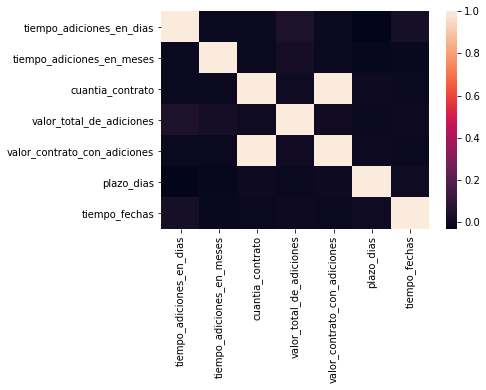

In [ ]:
import seaborn as sns
df_Adj_2020_Dr = df_Adjudicados_2020
df_Adj_2020_Dr.columns
df_Adj_2020_Dr.drop(['uid', 'anno_firma_del_contrato', 'nivel_entidad', 'orden_entidad','nombre_de_la_entidad', 'nit_de_la_entidad', 'c_digo_de_la_entidad','detalle_del_objeto_a_contratar',  'fecha_de_cargue_en_el_secop', 'numero_de_constancia','numero_de_proceso', 'numero_del_contrato', 'cuantia_proceso', 'id_ajudicacion', 'identificacion_del_contratista', 'nom_raz_social_contratista', 'identific_del_represen_legal', 'nombre_del_represen_legal', 'fecha_de_firma_del_contrato','fecha_ini_ejec_contrato', 'fecha_fin_ejec_contrato', 'ruta_proceso_en_secop_i', 'uid_proc'], 
        axis = 'columns', inplace=True)
print(df_Adj_2020_Dr.shape)
sns.heatmap(df_Adj_2020_Dr.corr())

Como podemos visualizar, ninguna de las variables numericas tienen correlación entre ellas. La únicas variables que tiene correlación es la variable de 'valor_contrato_con_adiciones' y 'cuantia_contrato', esto se debe a que una depende de la otra.

# Analisis de Comportamiento de Cuantia por Modalidad

A continuación haremos un análsis de cuantia de contratción por cada una de las modalidades de contratación 

Estadisticas de Licitación Pública
count    4.680000e+02
mean     2.209545e+09
std      1.495780e+10
min      0.000000e+00
25%      3.299332e+08
50%      6.155697e+08
75%      1.441739e+09
max      3.181381e+11
Name: cuantia_contrato, dtype: float64


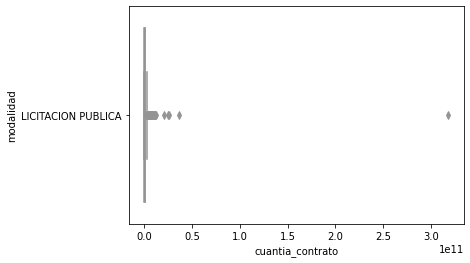

In [ ]:
df_2020_LP = df_Adj_2020_Dr[(df_Adj_2020_Dr['modalidad']=='LICITACION PUBLICA') ]
print("Estadisticas de Licitación Pública")
media = df_2020_LP['cuantia_contrato'].mean()
mediana = df_2020_LP['cuantia_contrato'].median()
maximo = df_2020_LP['cuantia_contrato'].max()
print(df_2020_LP['cuantia_contrato'].describe())
sns.boxplot(x='cuantia_contrato',y='modalidad', data=df_2020_LP , palette="vlag")

Tenemos el segundo cuadrante, 50%, en 615 Millones de Pesos y su valor maximo de 318 Mil Millones de Pesos

Estadisticas de Concurso de Méritos
count    2.040000e+02
mean     1.754613e+08
std      3.634949e+08
min      0.000000e+00
25%      2.754500e+07
50%      7.578515e+07
75%      1.826189e+08
max      3.986056e+09
Name: cuantia_contrato, dtype: float64


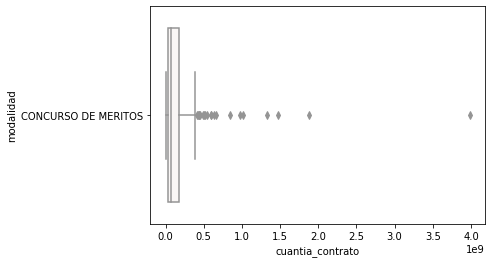

In [ ]:
df_2020_CM = df_Adj_2020_Dr[(df_Adj_2020_Dr['modalidad']=='CONCURSO DE MERITOS') ]
print("Estadisticas de Concurso de Méritos")
print(df_2020_CM['cuantia_contrato'].describe())
sns.boxplot(x='cuantia_contrato',y='modalidad', data=df_2020_CM , palette="vlag")


Tenemos el segundo cuadrante, 50%, en 75 Millones de Pesos y su valor maximo de 3.986 Millones de Pesos

Estadisticas de Selección Abreviada
count    1.728000e+03
mean     6.751511e+08
std      1.167945e+10
min      0.000000e+00
25%      6.599924e+07
50%      1.190354e+08
75%      2.036653e+08
max      3.806975e+11
Name: cuantia_contrato, dtype: float64


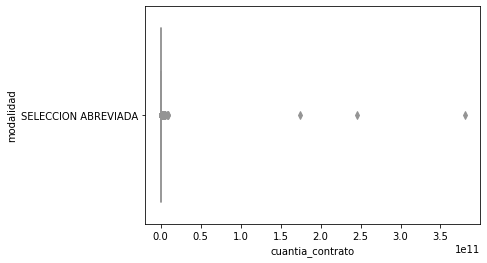

In [ ]:
df_2020_SA = df_Adj_2020_Dr[(df_Adj_2020_Dr['modalidad']=='SELECCION ABREVIADA') ]
print("Estadisticas de Selección Abreviada")
print(df_2020_SA['cuantia_contrato'].describe())
sns.boxplot(x='cuantia_contrato',y='modalidad', data=df_2020_SA , palette="vlag")

Tenemos el segundo cuadrante, 50%, en 119 Millones de Pesos y su valor maximo de 380 Mil Millones de Pesos

Estadisticas de Contratación Directa
count    2.131860e+05
mean     5.983130e+07
std      8.076152e+09
min      0.000000e+00
25%      5.093250e+06
50%      9.720000e+06
75%      1.790928e+07
max      3.570000e+12
Name: cuantia_contrato, dtype: float64


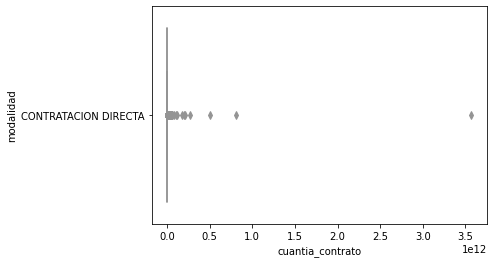

In [ ]:
df_2020_CD = df_Adj_2020_Dr[(df_Adj_2020_Dr['modalidad']=='CONTRATACION DIRECTA') ]
print("Estadisticas de Contratación Directa")
print(df_2020_CD['cuantia_contrato'].describe())
sns.boxplot(x='cuantia_contrato',y='modalidad', data=df_2020_CD , palette="vlag")

Tenemos el segundo cuadrante, 50%, en 9 Millones de Pesos y su valor maximo de más de 3 Billones

Estadisticas de Otras Formas de Contratación Directa
count    1.341690e+05
mean     6.844183e+07
std      2.504181e+09
min      0.000000e+00
25%      2.294000e+06
50%      5.481000e+06
75%      1.500000e+07
max      5.000000e+11
Name: cuantia_contrato, dtype: float64


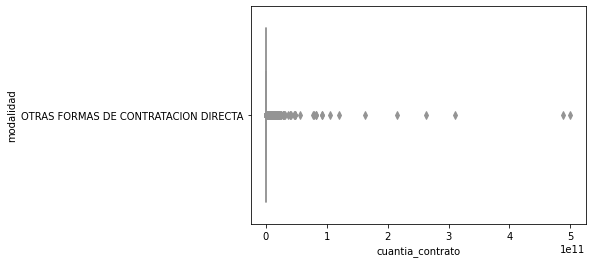

In [ ]:
df_2020_OFCD = df_Adj_2020_Dr[(df_Adj_2020_Dr['modalidad']=='OTRAS FORMAS DE CONTRATACION DIRECTA') ]
print("Estadisticas de Otras Formas de Contratación Directa")
print(df_2020_OFCD['cuantia_contrato'].describe())
sns.boxplot(x='cuantia_contrato',y='modalidad', data=df_2020_OFCD , palette="vlag")

Tenemos el segundo cuadrante, 50%, en mas de 5 Millones de Pesos y su valor maximo de 500 Mil Millones de Pesos

Estadisticas de Asociación Público Privada
count    2.000000e+01
mean     4.697891e+08
std      1.733630e+09
min      1.256250e+07
25%      2.500000e+07
50%      3.750000e+07
75%      4.319800e+07
max      7.809768e+09
Name: cuantia_contrato, dtype: float64


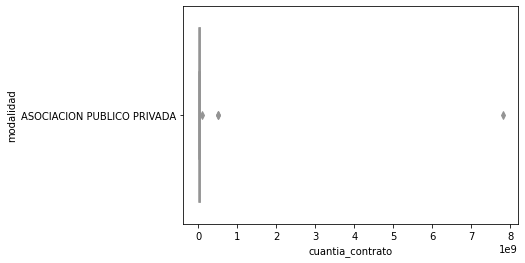

In [ ]:
df_2020_APP = df_Adj_2020_Dr[(df_Adj_2020_Dr['modalidad']=='ASOCIACION PUBLICO PRIVADA') ]
print("Estadisticas de Asociación Público Privada")
print(df_2020_APP['cuantia_contrato'].describe())
sns.boxplot(x='cuantia_contrato',y='modalidad', data=df_2020_APP , palette="vlag")



Tenemos el segundo cuadrante, 50%, en 37 Millones de Pesos y su valor maximo de 7.809 Millones de Pesos. EL valor máximo es demasiado atípitco con respecto a todos los valores de La asociación Público privada

Estadisticas de Mínima Cuantia
count    1.627700e+04
mean     2.127386e+07
std      3.015647e+08
min      0.000000e+00
25%      7.375000e+06
50%      1.645451e+07
75%      2.387515e+07
max      2.401352e+10
Name: cuantia_contrato, dtype: float64


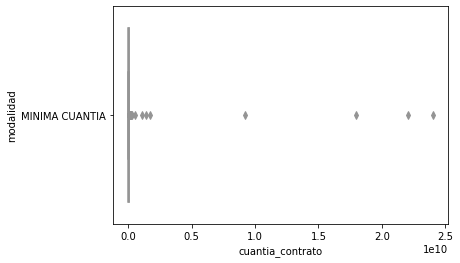

In [ ]:
df_2020_MC = df_Adj_2020_Dr[(df_Adj_2020_Dr['modalidad']=='MINIMA CUANTIA') ]
print("Estadisticas de Mínima Cuantia")
print(df_2020_MC['cuantia_contrato'].describe())
sns.boxplot(x='cuantia_contrato',y='modalidad', data=df_2020_MC , palette="vlag")


Tenemos el segundo cuadrante, 50%, en 73 Millones de Pesos y su valor maximo de 24 Mil Millones de Pesos